In [1]:
import gempy as gp
import numpy as np
import matplotlib.pyplot as plt

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\alut525\.conda\envs\pyvista_env\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


Not subsurface compatibility available


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
geo_model = gp.create_model('Opak Fault Model')
extent = [431500, 442800, 9122100, 9132800, -1000, 1000]
geo_model = gp.init_data(geo_model, extent=extent, resolution=[100, 100, 10])

Active grids: ['regular']


In [3]:
gp.set_interpolator(geo_model, theano_optimizer='fast_compile', verbose=[])

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                          values
range              15690.124282
$C_o$            5861428.571429
drift equations             [3]


In [4]:
geo_model.add_surfaces(['Wonosari', 'Nglanggran', 'Semilir', 'basement'])
geo_model.add_surface_points(X=441570, Y=9124996, Z=150, surface='Wonosari')
geo_model.add_surface_points(X=441570, Y=9124996, Z=-150, surface='Nglanggran')
geo_model.add_surface_points(X=441570, Y=9124996, Z=-450, surface='Semilir')
geo_model.add_surface_points(X=438084, Y=9124996, Z=600, surface='Wonosari')
geo_model.add_surface_points(X=438084, Y=9124996, Z=-100, surface='Nglanggran')
geo_model.add_surface_points(X=438084, Y=9124996, Z=-450, surface='Semilir')
geo_model.add_surface_points(X=435270, Y=9124996, Z=800, surface='Wonosari')
geo_model.add_surface_points(X=435270, Y=9124996, Z=300, surface='Nglanggran')
geo_model.add_surface_points(X=435270, Y=9124996, Z=-350, surface='Semilir')
geo_model.add_surface_points(X=431728, Y=9124996, Z=-100, surface='Wonosari')
geo_model.add_surface_points(X=431728, Y=9124996, Z=-750, surface='Nglanggran')
geo_model.add_surface_points(X=431728, Y=9124996, Z=-1200, surface='Semilir')
unit_colors = {'Wonosari': '#c0d4ef','Nglanggran': '#5d5447','Semilir':'#ffebb3'}
geo_model._surfaces.colors.change_colors(unit_colors)
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,Wonosari,Default series,1,#c0d4ef,1
1,Nglanggran,Default series,2,#5d5447,2
2,Semilir,Default series,3,#ffebb3,3
3,basement,Default series,4,#728f02,4


In [5]:
geo_model.add_orientations(X=434529, Y=9124996, Z=50, surface='Semilir', orientation=(120, 15, 1))
geo_model.add_orientations(X=432377, Y=9124996, Z=0, surface='Wonosari', pole_vector=(0, 0, 1))

,X,Y,Z,G_x,G_y,G_z,smooth,surface
1,432377.0,9124996.0,0.0,0.000000,0.00000,1.000000,0.01,Wonosari
0,434529.0,9124996.0,50.0,0.224144,-0.12941,0.965926,0.01,Semilir


In [6]:
geo_model.add_features('Fault1')
geo_model.reorder_features(['Fault1', 'Default series'])
geo_model.set_is_fault('Fault1')
geo_model.add_surfaces('fault1')
gp.map_stack_to_surfaces(geo_model, {'Fault1': 'fault1'})
geo_model.add_surface_points(X=433300, Y=9124996, Z=-30, surface='fault1')
geo_model.add_surface_points(X=433494, Y=9124996, Z=-300, surface='fault1')
geo_model.add_orientations(X=433494, Y=9124996, Z=-300, surface='fault1', orientation=(130, 60, -1))

Fault colors changed. If you do not like this behavior, set change_color to False.


,X,Y,Z,G_x,G_y,G_z,smooth,surface
2,433494.0,9124996.0,-300.0,-0.663414,0.55667,-0.500000,0.01,fault1
1,432377.0,9124996.0,0.0,0.000000,0.00000,1.000000,0.01,Wonosari
0,434529.0,9124996.0,50.0,0.224144,-0.12941,0.965926,0.01,Semilir


In [7]:
geo_model.set_topography(source='gdal',filepath='opak_topo_30m.tif')

Cropped raster to geo_model.grid.extent.
depending on the size of the raster, this can take a while...
storing converted file...
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[ 4.31556500e+05,  9.12215350e+06, -9.00000000e+02],
       [ 4.31556500e+05,  9.12215350e+06, -7.00000000e+02],
       [ 4.31556500e+05,  9.12215350e+06, -5.00000000e+02],
       ...,
       [ 4.42785013e+05,  9.13272507e+06,  2.89000000e+02],
       [ 4.42785013e+05,  9.13275504e+06,  2.84000000e+02],
       [ 4.42785013e+05,  9.13278501e+06,  2.71000000e+02]])

In [8]:
gp.compute_model(geo_model)

C:\Users\alut525\.conda\envs\pyvista_env\lib\site-packages\gempy\core\solution.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.geological_map = np.array(



Lithology ids 
  [4. 5. 5. ... 3. 2. 2.] 

C:\Users\alut525\.conda\envs\pyvista_env\lib\site-packages\pandas\plotting\_matplotlib\core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
C:\Users\alut525\.conda\envs\pyvista_env\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


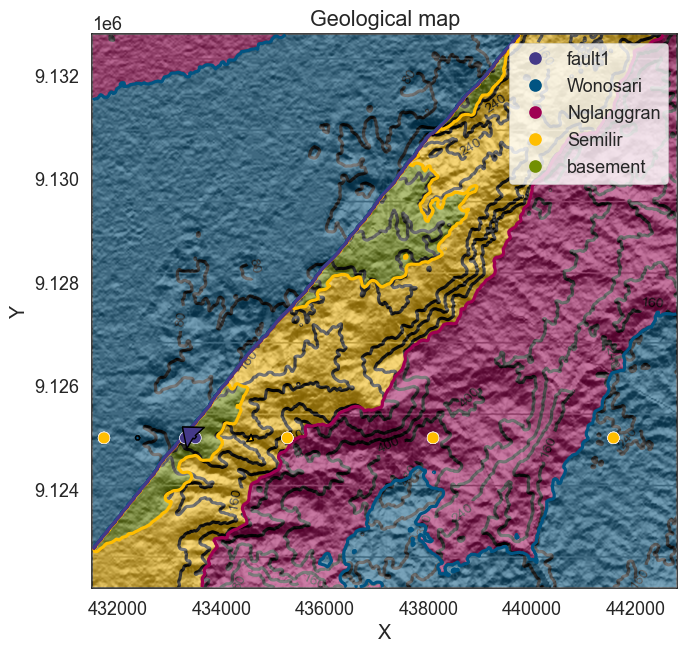

In [9]:
geo_model.get_active_grids()
gp.plot_2d(geo_model, section_names=['topography'], show_topography=True)

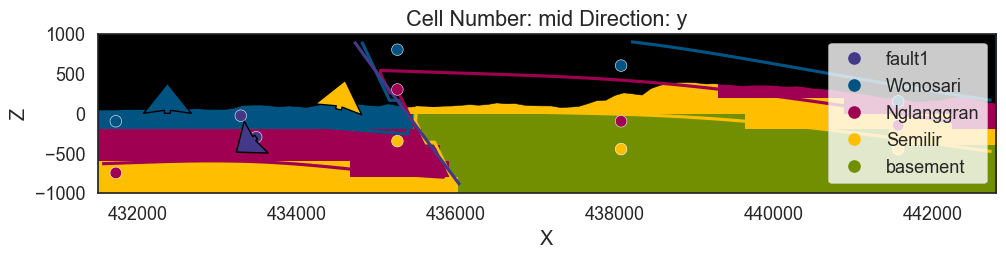

In [10]:
gp.plot_2d(geo_model, show_topography=True)
plt.show()

In [11]:
gp.plot_3d(geo_model, show_topography=True)

C:\Users\alut525\.conda\envs\pyvista_env\lib\site-packages\pyvista\plotting\tools.py:571: PyvistaDeprecationWarning: The usage of `parse_color` is deprecated in favor of the new `Color` class.
  warnings.warn(
